# Introduction to Bigraphs

Bigraphs were invented by Robin Milner as an extension/generalization of previous process calculi (some of which he invented as well). A process calculus is a way to formally model concurrent and distributed systems, including communication/interactions/synchronizations, along with a set of algebraic laws to reason about them. 

![bigraph](img/first-bigraph.png)

## space

The structure of a bigraph is defined as two superimposed graphs over a single set of nodes 
- *place* graph (forest) which is modeled as a tree
- *link* graph (hypergraph) which is a set of hyperedges 

![bare bigraph](img/bare-bigraph.png)

### place graph

The place graph represents the relative _location_ of each node (in terms of containment).

![forest](img/bigraph-and-forest.png)

### link graph

The link graph represents communication across place boundaries, ie common signals that all linked nodes share.  

![hypergraph](img/bigraph-and-hypergraph.png)

![anatomy](img/anatomy-of-bigraphs.png)

## motion

The "motion" of a bigraph is accomplished by _reaction rules_, which specify a `redex` showing a bigraph to match and `reactum` that shows the bigraph to replace it by. 

Here is an example bigraph (showing the system in a "locked" state): ![locked](img/reaction-locked.png)

### redex

When we take that bigraph and match it with this **redex**

![redex](img/reaction-redex.png)

### reactum

and substitute with this **reactum**

![reactum](img/reaction-reactum.png)

### transition

we end up with this result (the key has been "unlocked"):

![unlocked](img/reaction-unlocked.png)

### full reaction

Here is the full reaction from locked to unlocked state:

![reaction](img/reaction-example.png)

In [22]:
from bigraph.bigraph import Bigraph, Control, Node, Edge, Parallel, Merge, Big, InGroup, Condition, Reaction, Range, Assign, Init, Param, RuleGroup, Rules, Preds, System, BigraphicalReactiveSystem, visualize, visualize_transition
from bigraph.parse import bigraph

## operations

You can build complex bigraphs out of simpler bigraphs using the basic operations:
* A.B - *nest* (nesting B inside A)
* A | B - *merge* (side by side, but in the same region)
* A || B - *parallel* (side by side, different regions)
* A{b} - *link* (A is linked to edge b)
* A(b) - *parameterize* (A has parameter b)

## python API

You can parse bigraphs from strings into python objects, and you can also build up bigraphs programmatically using the python API. The basic operations are available:

### nest

In [23]:
A = bigraph('A')
B = bigraph('B')
A.nest(B)

A.B

### merge

In [24]:
A = bigraph('A')
B = bigraph('B')
Merge([A, B])

A | B

### parallel

In [25]:
A = bigraph('A')
B = bigraph('B')
Parallel([A, B])

A || B

### link

In [26]:
A = bigraph('A')
b = Edge('b')
A.link(b)

A{b}

### parsing

To parse a bigraph from a string, use the `bigraph` function:

In [27]:
parsed = bigraph('A.(B | C{m, n})')
parsed

A.(B | C{m,n})

The python bigraph objects are rendered by default, which mirrors the original form we parsed. 

We can also build this bigraph programmatically.

In [28]:
A = bigraph('A')
B = bigraph('B')
C = bigraph('C')
A, B, C

(A, B, C)

In [29]:
C.link('m')
C.link('n')
C

C{m,n}

In [30]:
merge = B.merge(C)
merge

B | C{m,n}

In [31]:
A.nest(merge)
A

A.(B | C{m,n})

In [32]:
import os
os.getcwd()

'/home/youdonotexist/code/bigraph/notebooks'

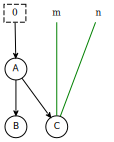

In [33]:
visualize(A)

TODO: show rendered results from running the system

TODO: render bigraphs in a nested way

## controls

Controls are a way to label nodes, giving it a kind of "type" which declares:
- **symbol** - the label given by this control
- **arity** - how many ports it has (where edges can connect)
- **fun** - any parameters nodes of this control may have
- **atomic** - whether it can have subnodes or not

Here is an example of a control with an arity of 2:

In [34]:
A = bigraph('ctrl A = 2')
A.symbol, A.arity

('A', 2)

Here is another control with named parameters:

In [35]:
C = bigraph('fun ctrl Compartment(volume, state) = 1')
C.symbol, C.arity, C.fun

('Compartment', 1, ('volume', 'state'))

### nodes and controls

Controls give us a more principled way to create nodes, and provide a way to structure our systems and guide reactions to target specific elements.

In [36]:
C1 = Node(control=C, params=(0.3, "stable"), ports=('atp',))
C2 = Node(control=C, params=(11.1111, "active"), ports=('chromosome',))
C1, C2

(Compartment(0.3,stable){atp}, Compartment(11.1111,active){chromosome})

We can even assign parameters this way

In [37]:
C1.assign('volume', 0.4)

Compartment(0.4,stable){atp}

## reactions

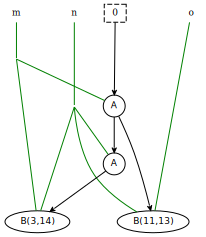

In [38]:
visualize_transition(0, '../out/test/validate') # TODO figure out how to return a svg/png

### specifying reaction rules



### applying a reaction rule to a bigraph

## reactive systems

### declaring a reactive system

### execute the system

### observing the transitions